<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Area-Plot" data-toc-modified-id="Area-Plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Area Plot</a></span></li><li><span><a href="#Histogram" data-toc-modified-id="Histogram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Bar-Chart" data-toc-modified-id="Bar-Chart-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bar Chart</a></span></li><li><span><a href="#Pie-Chart" data-toc-modified-id="Pie-Chart-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pie Chart</a></span></li><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Box Plot</a></span></li><li><span><a href="#Scatter-Plot" data-toc-modified-id="Scatter-Plot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scatter Plot</a></span></li><li><span><a href="#Line-Plot" data-toc-modified-id="Line-Plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Line Plot</a></span></li><li><span><a href="#Word-Clouds" data-toc-modified-id="Word-Clouds-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Word Clouds</a></span></li></ul></div>

# Assignment 1
Tegar Ahmad Arsy
PYTN-KS07-020

Pada Assignment 1 akan memvisualisasi dari data London Crime by Isoa menggunakan beberapa teknik, diantaranya adalah
* Area Plot
* Histogram
* Bar Chart
* Pie Chart
* Box Plot
* Scatter plot
* Line plot
* Word Clouds

In [1]:
# import library yang diperlukan

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as img
from wordcloud import WordCloud, STOPWORDS
from scipy import stats


In [2]:
# membaca file yang diperlukan
df = pd.read_csv('london_crime_by_lsoa.csv', dtype={'year':str, 'month':str})

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            object
 6   month           object
dtypes: int64(1), object(6)
memory usage: 720.5+ MB


In [5]:
df.describe(include='O')

,lsoa_code,borough,major_category,minor_category,year,month
count,13490604,13490604,13490604,13490604,13490604,13490604
unique,4835,33,9,32,9,12
top,E01003689,Croydon,Theft and Handling,Common Assault,2016,11
freq,3456,602100,3966300,522180,1498956,1124217


In [6]:
# Mencari informasi tahun dalam dataset

df['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

## Area Plot


**Question** = Berapakah jumlah kriminalitas di Redbridge dari tahun 2008 - 2016

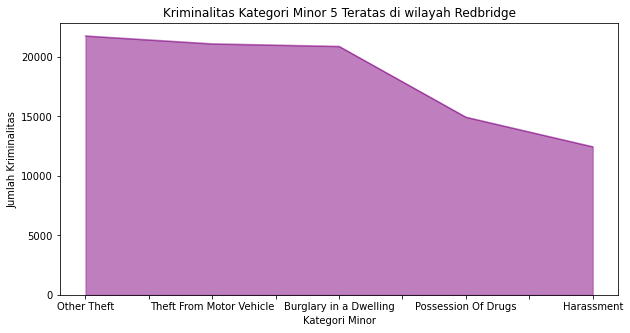

In [7]:
df_rb = df.loc[(df['borough']=='Redbridge')] 

df_rb_head = df_rb.groupby('minor_category', axis=0).sum().sort_values(by=['value'], ascending = False).head(5)


df_rb_head['value'].plot(kind = 'area', stacked = False, color = 'purple',
             figsize=(10,5)); #agar grafik tidak menutupi tulisan)

#menambahkan judul
plt.title('Kriminalitas Kategori Minor 5 Teratas di wilayah Redbridge');

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas');

#menambahkan keterangan di sumbu-x
plt.xlabel('Kategori Minor');


Dari area plot di atas, dapat disimpulkan bahwa jumlah kriminalitas 5 teratas di wilayah Redbridge pada kategori minor antara lain Other Thef, Thef from motor vehicle, Burglary in a Dwelling, Possession of Drugs dan Harrasment.

## Histogram

**Question** = Bagaimana sebaran kriminalitas kategori mayor di wilayah RedBridge 

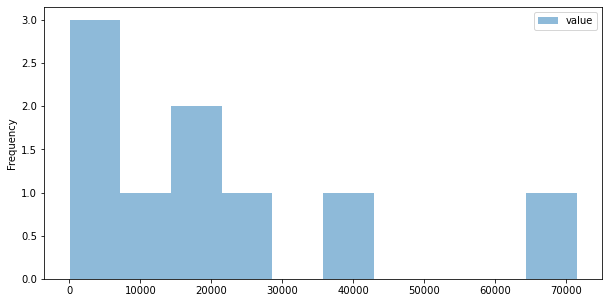

In [8]:
df_rb_minor = df_rb.groupby('major_category', axis=0).sum()

count, bin_edges = np.histogram(df_rb_minor, bins = 10)

df_rb_minor.plot(kind = 'hist',
             alpha=0.5, #transparansi
             bins=10,
             figsize=(10,5));

## Bar Chart

**Question** = Angka kejahatan pada kategoru minor dari tahun 2010-2015

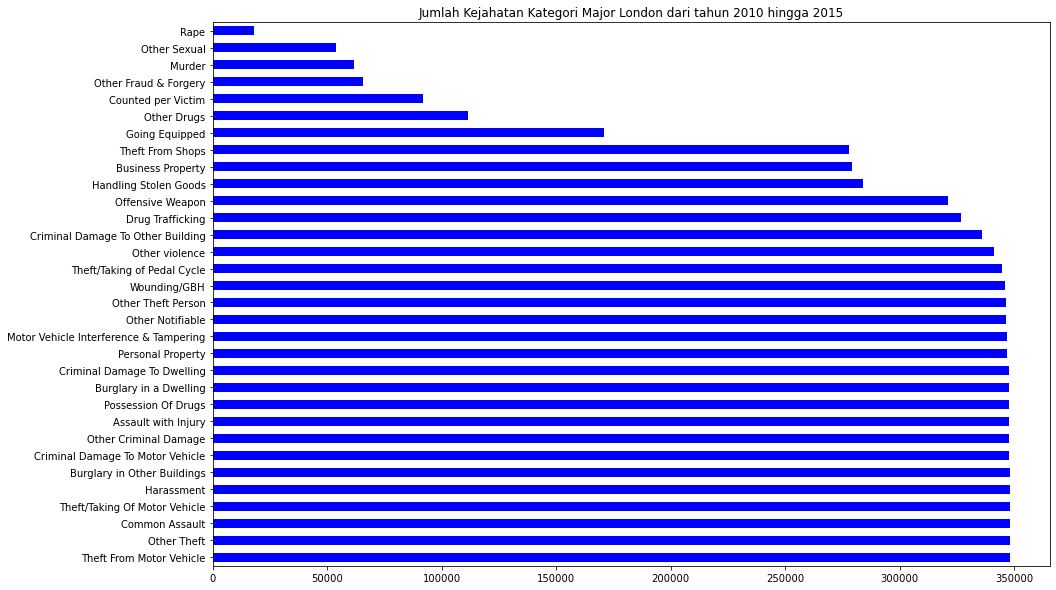

In [20]:
df["year"] = df["year"].astype("int")
slice_year = df.loc[(df['year']>=2010)&
    (df['year']<= 2015)]

minor = slice_year.minor_category.value_counts(ascending=False)

minor.plot.barh(figsize = (15, 10),
                    color = 'blue',
                    title = "Jumlah Kejahatan Kategori Major London dari tahun 2010 hingga 2015");


In [21]:
minor

Theft From Motor Vehicle                  348120
Other Theft                               348120
Common Assault                            348120
Theft/Taking Of Motor Vehicle             348048
Harassment                                348048
Burglary in Other Buildings               348048
Criminal Damage To Motor Vehicle          347976
Other Criminal Damage                     347904
Assault with Injury                       347904
Possession Of Drugs                       347832
Burglary in a Dwelling                    347688
Criminal Damage To Dwelling               347616
Personal Property                         347112
Motor Vehicle Interference & Tampering    346968
Other Notifiable                          346464
Other Theft Person                        346320
Wounding/GBH                              346248
Theft/Taking of Pedal Cycle               344664
Other violence                            341352
Criminal Damage To Other Building         335952
Drug Trafficking    

## Pie Chart 

**Question** = Berapa presentase kejahatan di London pada tahun 2010 hingga 2015

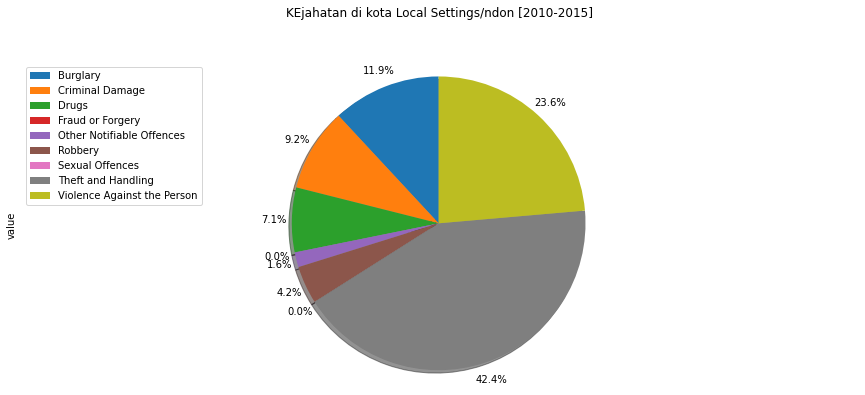

In [11]:
crime = slice_year.groupby('major_category', axis=0).sum()

crime['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,
                            
                        )
plt.title("KEjahatan di kota Local Settings/ndon [2010-2015]", y=1.12)
plt.axis('equal')
plt.legend(labels=crime.index, loc='upper left')
plt.show()

## Box Plot

**Question** = Bagaimana visualisasi menggunakan box plot pada Drug Trafficking di tahun 2010 - 2015

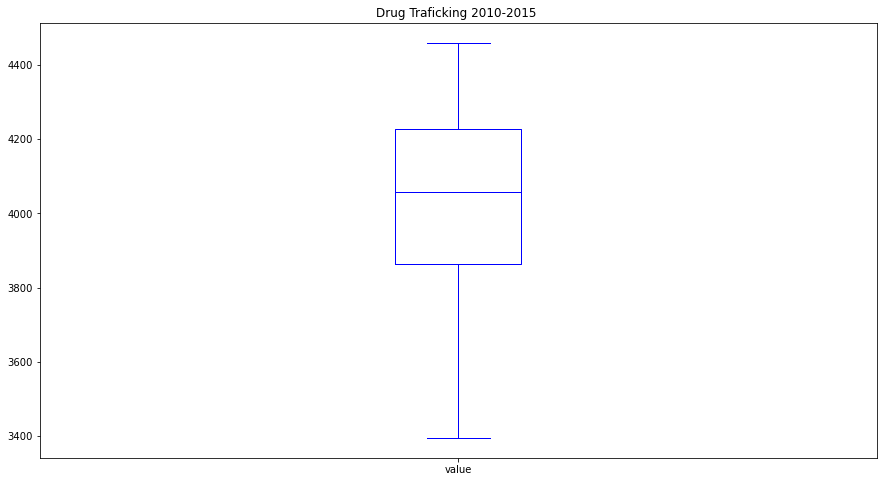

In [12]:
drug = slice_year.loc[slice_year['minor_category']== 'Drug Trafficking', ['value','year']].groupby('year').sum()

drug['value'].plot(kind = 'box',
             stacked = False,
             color = 'blue',
             figsize=(15,8)); #agar grafik tidak menutupi tulisan

#menambahkan judul
plt.title('Drug Traficking 2010-2015 ');



## Scatter Plot

**Question** = Bagaimana gambaran menggunakan scatter plot pada kejahatan Drug Trafficking dari tahun 2008 hingga 2016

In [13]:
drug2 = df.loc[df['minor_category']== 'Drug Trafficking', ['value','year']].groupby('year').sum()

drug2.index = map(int, drug2.index) 
drug2.reset_index(inplace=True)
drug2.columns = ['year', 'value']
drug2


,year,value
0,2008,4203
1,2009,4172
2,2010,4252
3,2011,4460
4,2012,3964
5,2013,4151
6,2014,3830
7,2015,3395
8,2016,3392


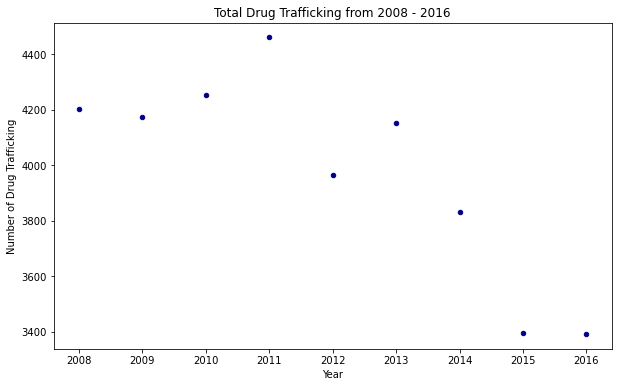

In [14]:
drug2.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')

plt.title('Total Drug Trafficking from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Drug Trafficking')

plt.show()

## Line Plot

**Question** = Bagaimana sebaran kejahatan pembunuhan pada tahun 2008 - 2010

In [15]:
#slicing
murder = df.loc[(df['minor_category']=='Murder')].groupby('year').sum()


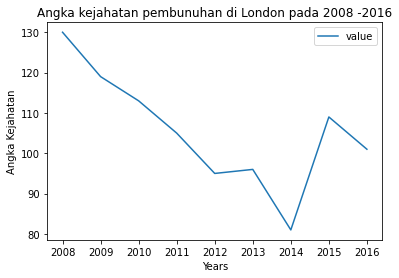

In [16]:
murder.plot(kind='line')
plt.title('Angka kejahatan pembunuhan di London pada 2008 -2016')
plt.ylabel('Angka Kejahatan')
plt.xlabel('Years')
plt.show()

## Word Clouds

**Question** = Menampilkan semua yang terdapat dalam kolom borough

In [18]:
borough = df['borough']
borough.to_csv("borough.txt", header=None, index=None, sep=' ', mode='a')
borough = open("borough.txt", 'r').read()

stopwords = set(STOPWORDS)
borough_wd = WordCloud(
        background_color='white',
        stopwords=stopwords)
borough_wd.generate(borough);

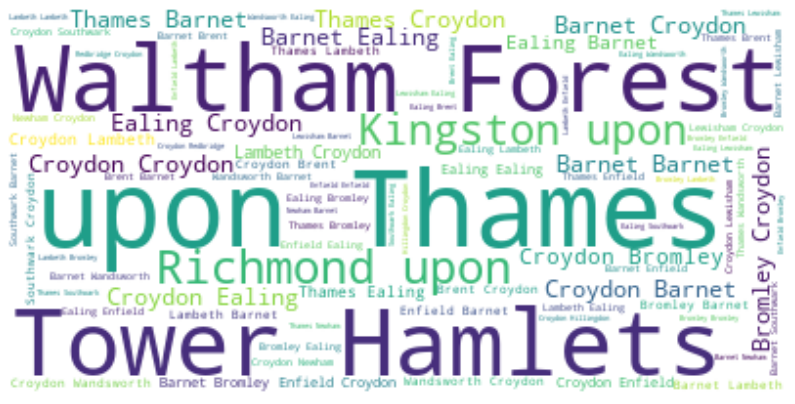

In [19]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(borough_wd, interpolation = 'bilinear')
plt.axis('off')

plt.show()